# tasks.ipynb
# Ciaran Moran
# Student ID: G00426050
# Email: G00426050@atu.ie

This notebook is for Python tasks (1-4) for the ATU course *Applied Statistics*.

# Task 1: Permutations and Combinations
## Lady Tasting Tea
### Based on code from
###  - Ian McLoughlin (Ian.McLoughlin@atu.ie)  
###  - Github: https://github.com/ianmcloughlin/2425_applied_statistics

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Normality
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
import scipy.stats as stats

# To plot the histogram
#  https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
import matplotlib.pyplot as plt


## The Design of Experiments

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">
> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup. We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.<br><br>
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.<br><br>
> <i>The Design of Experiments By Ronald A. Fisher</i>

## Permutations and Combinations

### Permutations

A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.


### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

## Cups of Tea

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

## math.comb(n, k)

https://docs.python.org/3/library/math.html#math.comb

Calculate the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.


In [3]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

Label the twelve cups of tea `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `10`, `11` and `12`.

We select six cups to have milk in first.

For example, we might select `2`, `4`, `5`, '6', '7' and `8`.

Visualize having six placeholders where we place six of the cup labels.

How many ways are there to select six cups from twelve?

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _ _ _`



In [4]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

Note we don't care about order: if cups `2`, `4`, `5`, `6`, `7`,and `8` are selected in order it is the same result as if `2`, `8`, `4`, `5`, `6` and `7` were selected, or any other permutation.

`2 3 4 8 6 5`

`8 6 4 5 3 2`

`_ _ _ _ _ _`

In [5]:
# No of ways of shuffling six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [6]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

## Formula

In mathematics, the `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [7]:
# Number of cups of tea in total.
n = 12

In [8]:
# Number of cups of tea with milk in first.
k = 6

## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [9]:
# Twelve factorial.
math.factorial(n)

479001600

In [10]:
# Six factorial.
math.factorial(k)

720

In [11]:
# Six factorial.
math.factorial(n - k)

720

In [12]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

```
n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1
k! = 6 x 5 x 4 x 3 x 2 x 1
(n - k)! = 6 x 5 x 4 x 3 x 2 x 1
n!/(n - k)! = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (6 x 5 x 4 x 3 x 2 x 1) = 12 x 11 x 10 x 9 x 8 x 7
```

#### Aside

In [13]:
# How many ways are there to shuffle a deck of 52 cards?
math.factorial(52)

80658175170943878571660636856403766975289505440883277824000000000000

## Ordering of Results

https://docs.python.org/3/library/itertools.html#itertools.combinations

In [14]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [15]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [16]:
# Number of combinations.
len(combs)

924

In [17]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 1, 5, 8, 10, 11]

In [18]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 1, 5, 8, 10, 11}

In [19]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1, 5} 3
(0, 1, 2, 3, 4, 6) {0, 1} 2
(0, 1, 2, 3, 4, 7) {0, 1} 2
(0, 1, 2, 3, 4, 8) {0, 1, 8} 3
(0, 1, 2, 3, 4, 9) {0, 1} 2
(0, 1, 2, 3, 4, 10) {0, 1, 10} 3
(0, 1, 2, 3, 4, 11) {0, 1, 11} 3
(0, 1, 2, 3, 5, 6) {0, 1, 5} 3
(0, 1, 2, 3, 5, 7) {0, 1, 5} 3
(0, 1, 2, 3, 5, 8) {0, 1, 5, 8} 4
(0, 1, 2, 3, 5, 9) {0, 1, 5} 3
(0, 1, 2, 3, 5, 10) {0, 1, 10, 5} 4
(0, 1, 2, 3, 5, 11) {0, 1, 11, 5} 4
(0, 1, 2, 3, 6, 7) {0, 1} 2
(0, 1, 2, 3, 6, 8) {0, 1, 8} 3
(0, 1, 2, 3, 6, 9) {0, 1} 2
(0, 1, 2, 3, 6, 10) {0, 1, 10} 3
(0, 1, 2, 3, 6, 11) {0, 1, 11} 3
(0, 1, 2, 3, 7, 8) {0, 1, 8} 3
(0, 1, 2, 3, 7, 9) {0, 1} 2
(0, 1, 2, 3, 7, 10) {0, 1, 10} 3
(0, 1, 2, 3, 7, 11) {0, 1, 11} 3
(0, 1, 2, 3, 8, 9) {0, 1, 8} 3
(0, 1, 2, 3, 8, 10) {0, 1, 10, 8} 4
(0, 1, 2, 3, 8, 11) {0, 1, 11, 8} 4
(0, 1, 2, 3, 9, 10) {0, 1, 10} 3
(0, 1, 2, 3, 9, 11) {0, 1, 11} 3
(0, 1, 2, 3, 10, 11) {0, 1, 10, 11} 4
(0, 1, 2, 4, 5, 6) {0, 1, 5} 3
(0, 1, 2, 4, 5, 7) {0, 1, 5} 3
(0, 1, 2, 4, 5, 8) {0, 1, 5, 8} 4
(0, 1, 2

In [20]:
# Show the overlaps.
print(no_overlaps)

[3, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 5, 4, 4, 5, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 5, 4, 3, 3, 4, 3, 4, 4, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 5, 4, 4, 5, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 5, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 5, 4, 4, 5, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 5, 4, 4, 3, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 4, 5, 5, 5, 6, 5, 3, 4, 4, 3, 3, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 2, 2, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 2, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 4, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 2, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 5, 4, 2, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 3, 

In [21]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

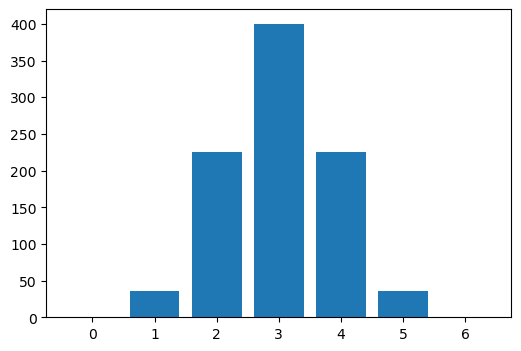

In [22]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

## The Null Hypothesis

- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the six cups from the twelve cups at random.

## Alternative Hypothesis

- The lady can tell the difference. 

### Evidence

Fisher: if the lady is just picking six cups at random, then it is unlikely she will pick the correct six. The probability is one in nine hundred and twenty four. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [23]:
# The probability that she (randomly) selects the six correct cups.
1 / 924

0.0010822510822510823

In [24]:
# The probability that she (randomly) selects at least five correct cups.
# i.e. one error is made.
# 36 and 1 retrieved from the array above, which is...
# array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))
#print('1/70:' , 1/70)
#print('math.comb cals 5 from 6:' , 1 / math.comb(6,5))
#print('math.comb cals 4 from 6:' , 1 / math.comb(6,4))
#print('math.comb cals 3 from 6:' , 1 / math.comb(6,3))
#print('math.comb cals 5 from 12:' , 1 / math.comb(12,5))
(36 + 1) / 924

0.04004329004329004

In [25]:
# The probability that she (randomly) selects at least four correct cups.
# i.e. two errors are made.
# 36 and 1 retrieved from the array above, which is...
# array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))
print('math.comb cals :' , 1 / math.comb(12,4))
(36 + 1) / 924

math.comb cals : 0.00202020202020202


0.04004329004329004

## Type I Errors, Type II Errors, and Power

 - Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types
 - Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description

# Task 2: numpy's Normal Distribution

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.


In [26]:

# Generate a sample of one hundred thousand values using the function  
# with mean `10.0` and standard deviation `3.0`.

# Ref https://stackoverflow.com/questions/68321993/how-would-i-generate-100000-random-numbers-using-a-normal-distribution-with-a-sp
mean: float = 10.0
stdev: float = 3.0
n_samples: int = 100_000 # Ref https://stackoverflow.com/questions/49837534/what-do-1-000-and-100-000-mean

samples: np.ndarray = np.random.normal(loc=mean,
                                       scale=stdev,
                                       size=n_samples)

#print(samples)



# shapiro - test for normality
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)  
Perform the Shapiro-Wilk test for normality.  
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.  

Parameters:  
x  
array_like  
Array of sample data. Must contain at least three observations.  

axis  
int or None, default: None  
If an int, the axis of the input along which to compute the statistic. The statistic of each axis-slice (e.g. row) of the  input will appear in a corresponding element of the output. If None, the input will be raveled before computing the  statistic.  

nan_policy  
{‘propagate’, ‘omit’, ‘raise’}  
Defines how to handle input NaNs.  

propagate:  
if a NaN is present in the axis slice (e.g. row) along which the statistic is computed, the corresponding entry  of the output will be NaN.  

omit:  
NaNs will be omitted when performing the calculation. If insufficient data remains in the axis slice along which the  statistic is computed, the corresponding entry of the output will be NaN.  

raise:  
if a NaN is present, a ValueError will be raised.

keepdims
bool, default: False
If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

Returns:  
statistic
float
The test statistic.

p-value
float
The p-value for the hypothesis test.



### Shapiro-Wilk Test Explained
Referenced from  (https://builtin.com/data-science/shapiro-wilk-test)  
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed.  
It evaluates data from a sample with the null hypothesis that the data set is normally distributed.  
A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t  
normally distributed.

https://www.statology.org/the-concise-guide-to-interpreting-p-values/  
Typically, researchers use a significance level of 0.05 as a cutoff for statistical significance.  
Here’s what it means in practice:  
  
If p < 0.05: This means that if the null hypothesis were true, we’d expect to see results  
as extreme as ours less than 5% of the time. In this case, we typically reject the null hypothesis  
and consider our results statistically significant. For our blood pressure example, we might conclude  
that there’s evidence the medication does have an effect on blood pressure.  
   
If p > 0.05: This means that if the null hypothesis were true, we’d expect to see results  
as extreme as ours more than 5% of the time. In this case, we fail to reject the null hypothesis  
and consider our results not statistically significant. For our example, we might conclude that we  
don’t have sufficient evidence to say the medication affects blood pressure.

In [27]:
# Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
# Explain the results and output.

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
# shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)
# Perform the Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
res = stats.shapiro(samples)
res.statistic
print('statistic: ',res.statistic) # example output 0.9999668002128601
print('pvalue: ',res.pvalue)

statistic:  0.9999703764915466
pvalue:  0.610993504524231


c:\Users\Administrator\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Sample output:  
statistic:  0.9999709129333496  
pvalue:  0.6299029588699341  

Given the p-value is greater than the typical significance level (0.05), I do not reject the null hypothesis.  
This suggests that the sample likely comes from a normal distribution.

#### Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.


Text(0.5, 1.0, 'normal distribution probability density function: mean = 10.0, stdev = 3.0')

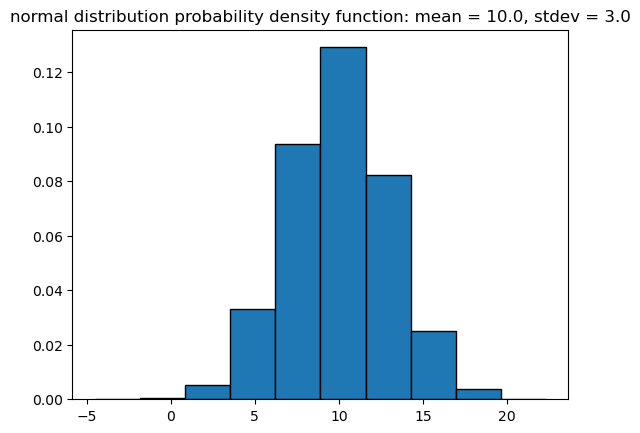

In [28]:
# Plot a histogram
plt.hist(samples, edgecolor='black', density = True ) #bins = np.linspace(-4,4,31))
title = "normal distribution probability density function: mean = " +  str(mean) + ", stdev = " + str(stdev) 
plt.title(title)


# Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.  
  
(Table generated using tool at https://www.tablesgenerator.com/markdown_tables#)  

  
| **Patient** | **0** | **1** | **2** | **3** | **4** | **5** | **6** | **7** | **8** | **9** |
|-------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Before      | 63    | 68    | 70    | 64    | 74    | 67    | 70    | 57    | 66    | 65    |
| After       | 64    | 64    | 68    | 64    | 73    | 70    | 72    | 54    | 61    | 63    |  

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

## t-statictic
### Definition from https://en.wikipedia.org/wiki/T-statistic

In statistics, the **t-statistic** is the ratio of the difference in a number’s estimated value from its assumed value to its standard error. It is used in hypothesis testing via Student's t-test. The t-statistic is used in a t-test to determine whether to support or reject the **null hypothesis**.  

It is very similar to the z-score but with the difference that t-statistic is used when the sample size is small or the population standard deviation is unknown. For example, the t-statistic is used in estimating the population mean from a sampling distribution of sample means if the population standard deviation is unknown.  

It is also used along with p-value when running hypothesis tests where the p-value tells us what the odds are of the results to have happened.

In [29]:
# coding the solution, some websites used for code re-use
# https://stackoverflow.com/questions/28405442/calculating-t-statistics-using-scipy-stats
# https://linuxhaxor.net/code/scipy-t-test.html
# https://neuraldatascience.io/5-eda/ttests.html
# https://docs.scipy.org/doc/scipy/tutorial/stats/analysing_one_sample.html
# https://www.scicoding.com/guide-to-t-test-in-python-applications-in-data-analysis/

# Set up the before and after data in an array
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

#now get the differences between the sets of after / before data
#differences will similarly be stored in an array
differences = after - before
print(differences)
#next calculate the mean of the differences using numpy mean
mean_difference = np.mean(differences)

#numpy.std
#https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy-std

# now calculate the standard deviation using numpy std
#ddof=1 :-
#  Specifying the difference in degrees of freedom in np.std as 1
#  As seen here - https://stackoverflow.com/questions/28405442/calculating-t-statistics-using-scipy-stats
std_difference = np.std(differences,ddof=1)
#store the length/number of standard deviation differences
num_std_diff = len(differences)

# Next calculate the t-statistic
# Seems to me that the float is required for np.sqrt according to the stackoverflow code.
t_statistic = mean_difference / (std_difference / np.sqrt(float(num_std_diff)))

# Now calculate the t-statistic using sciopy.stats
# This will be used to compare our calculated t-statistic above
# ttest_rel - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html?ref=localhost#ttest-rel
# https://www.scicoding.com/guide-to-t-test-in-python-applications-in-data-analysis/
t_statistic_scipy, p_value = stats.ttest_rel(before, after)

#now lets display the calculated and scipy results
print("Calculated t-statistic: ",t_statistic) 
print("t-statistic from scipy.stats: ", t_statistic_scipy) 
print("p-value from scipy.stats: ", p_value)
                                                                                                                  

[ 1 -4 -2  0 -1  3  2 -3 -5 -2]
Calculated t-statistic:  -1.3372274824806283
t-statistic from scipy.stats:  1.337227482480628
p-value from scipy.stats:  0.21396011317404623


Sample output from above:-  
  
[ 1 -4 -2  0 -1  3  2 -3 -5 -2]  
Calculated t-statistic:  -1.3372274824806283  
t-statistic from scipy.stats:  1.337227482480628  
p-value from scipy.stats:  0.21396011317404623  

## Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.  
  
Now use a loop to perform the following test 10,000 times.  
  
Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.  
  
Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.  
  
Summarize and explain your results.  

### What is a type II error in statistics.
Summary description of Type I and type II errors from [WikiPedia](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).  
There is more detailed in-depth info available there also.
  
In statistical hypothesis testing, a type I error, or a false positive, is the rejection of the null hypothesis when it is actually true. A type II error, or a false negative, is the failure to reject a null hypothesis that is actually false.  
  
Type I error: an innocent person may be convicted.  
Type II error: a guilty person may be not convicted.

### Websites referenced
[SciPy - Perform one-way ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)  
[WikiPedia - Type I and type II errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)


In [30]:
# Initialize the required counter for type II errors
no_type_ii = 0

# Perform tests 10,000 times, so set this counter in a variable
num_tests = 10_000

# Loop 10,000 times to generate tests
for i in range(num_tests):
    test1=np.random.normal(4.9, 0.1, 100)
    test2=np.random.normal(5.0, 0.1, 100)
    test3=np.random.normal(5.1, 0.1, 100)

    #print("test1>", test1)
    #print("test2>", test2)
    #print("test3>", test3)

    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(test1, test2, test3)

    #print("f_statistic>", f_statistic)
    #print("p_value", p_value)

    # Check if we fail to reject the null hypothesis (p-value > 0.05)
    if p_value > 0.05:
        no_type_ii += 1

# Calculate the probability of committing a type II error 
prob_type_ii_error = no_type_ii / num_tests

# Finally print the results 
print("number of type ii errors out of 10,000: ", no_type_ii)
print("Number of Type II errors: " , no_type_ii)
print("Probability of committing a Type II error: ", prob_type_ii_error)


number of type ii errors out of 10,000:  0
Number of Type II errors:  0
Probability of committing a Type II error:  0.0


## Findings
For the number of times I have run this code, the results is always the same.  
That is that the number of Type II error is always zero.  
Due to that, the probability is also always zero.   
  
The reason is that the three samples (4.9, 5.0 and 5.1) are so close (deviation 0.1) that the p-value is always less than 0.05.   

And therefore the Anova Test results in the rejection of the null hypothesis for all 10,000 tests.

## End